In [1]:
print('hello')

hello


In [1]:
import json
from collections import Counter
from datetime import datetime
import re

# Load JSON data
input_file = "dilarakimdi_captions_with_dates.json"  # Replace with the path to your JSON file
output_file = "categorized_captions.json"

with open(input_file, "r", encoding="utf-8") as f:
    data = json.load(f)

captions = data["captions"]

# Define categories and keywords
categories = {
    "emotional": ["love", "magical", "felt", "amazing", "garip", "tesaduf"],
    "humorous": ["sobriyetemin", "obez", "irkcı", "grÖtesk"],
    "nostalgic": ["geçen sene", "hollandadan", "market", "geçmiş"],
    "random": ["hayat", "barbie", "Barbenheimer"],
}

# Categorize captions
categorized_data = []
for caption_data in captions:
    caption_text = caption_data["caption"].lower()
    date = caption_data["date"]
    
    # Match category based on keywords
    matched_category = "other"
    for category, keywords in categories.items():
        if any(keyword in caption_text for keyword in keywords):
            matched_category = category
            break

    # Append categorized caption
    categorized_data.append({
        "date": date,
        "caption": caption_data["caption"],
        "category": matched_category,
    })

# Save categorized captions
with open(output_file, "w", encoding="utf-8") as f:
    json.dump({"categorized_captions": categorized_data}, f, ensure_ascii=False, indent=4)

# Extract insights
def analyze_captions(captions):
    all_text = " ".join([caption["caption"] for caption in captions])
    word_count = Counter(re.findall(r'\w+', all_text.lower()))
    most_common_words = word_count.most_common(10)
    caption_dates = [datetime.strptime(c["date"], "%Y-%m-%d %H:%M:%S") for c in captions]
    most_active_month = Counter([date.strftime("%Y-%m") for date in caption_dates]).most_common(1)

    print("Top 10 Most Common Words:")
    for word, count in most_common_words:
        print(f"{word}: {count}")
    
    if most_active_month:
        print(f"Most Active Month: {most_active_month[0][0]} with {most_active_month[0][1]} captions")

analyze_captions(categorized_data)


Top 10 Most Common Words:
ve: 109
bir: 85
bu: 68
çok: 61
i: 48
da: 42
ama: 41
ben: 40
için: 40
var: 38
Most Active Month: 2019-01 with 30 captions


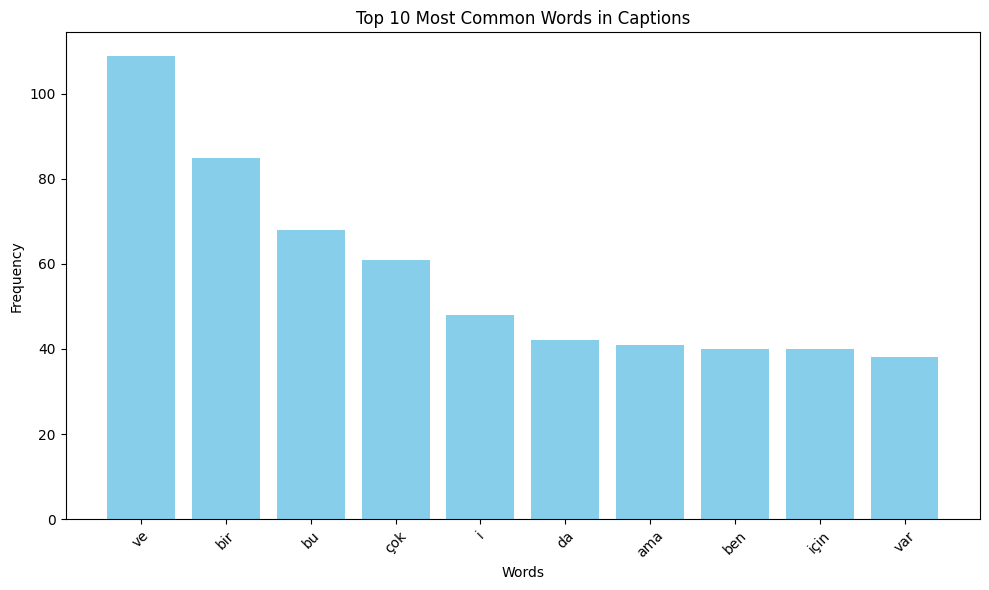

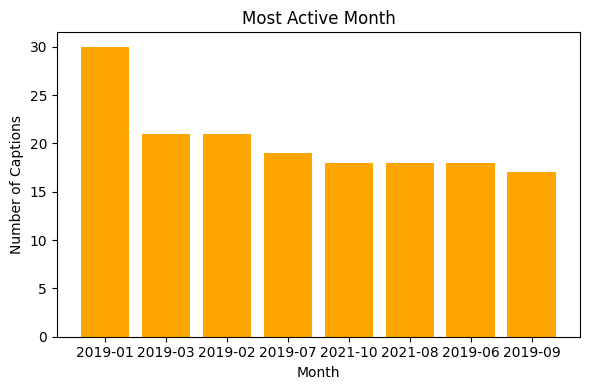

In [6]:
import json
from collections import Counter
from datetime import datetime
import re
import matplotlib.pyplot as plt

# Load JSON data
input_file = "dilarakimdi_captions_with_dates.json"  # Replace with the path to your JSON file
output_file = "categorized_captions.json"

with open(input_file, "r", encoding="utf-8") as f:
    data = json.load(f)

captions = data["captions"]

# Define categories and keywords
categories = {
    "emotional": ["love", "magical", "felt", "amazing", "garip", "tesaduf"],
    "humorous": ["sobriyetemin", "obez", "irkcı", "grÖtesk"],
    "nostalgic": ["geçen sene", "hollandadan", "market", "geçmiş"],
    "random": ["hayat", "barbie", "Barbenheimer"],
}

# Categorize captions
categorized_data = []
for caption_data in captions:
    caption_text = caption_data["caption"].lower()
    date = caption_data["date"]
    
    # Match category based on keywords
    matched_category = "other"
    for category, keywords in categories.items():
        if any(keyword in caption_text for keyword in keywords):
            matched_category = category
            break

    # Append categorized caption
    categorized_data.append({
        "date": date,
        "caption": caption_data["caption"],
        "category": matched_category,
    })

# Save categorized captions
with open(output_file, "w", encoding="utf-8") as f:
    json.dump({"categorized_captions": categorized_data}, f, ensure_ascii=False, indent=4)

# Function for analysis and plotting
def plot_analysis(captions):
    # Count words and find the most common
    all_text = " ".join([caption["caption"] for caption in captions])
    word_count = Counter(re.findall(r'\w+', all_text.lower()))
    most_common_words = word_count.most_common(10)
    
    # Find the most active month
    caption_dates = [datetime.strptime(c["date"], "%Y-%m-%d %H:%M:%S") for c in captions]
    most_active_month = Counter([date.strftime("%Y-%m") for date in caption_dates]).most_common(8)
    
    # Data for plotting
    words, frequencies = zip(*most_common_words)
    active_month, active_count = zip(*most_active_month)
    
    # Plot Top 10 Most Common Words
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.title("Top 10 Most Common Words in Captions")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot Most Active Month
    plt.figure(figsize=(6, 4))
    plt.bar(active_month, active_count, color='orange')
    plt.title("Most Active Month")
    plt.xlabel("Month")
    plt.ylabel("Number of Captions")
    plt.tight_layout()
    plt.show()

# Run the plot function
plot_analysis(categorized_data)


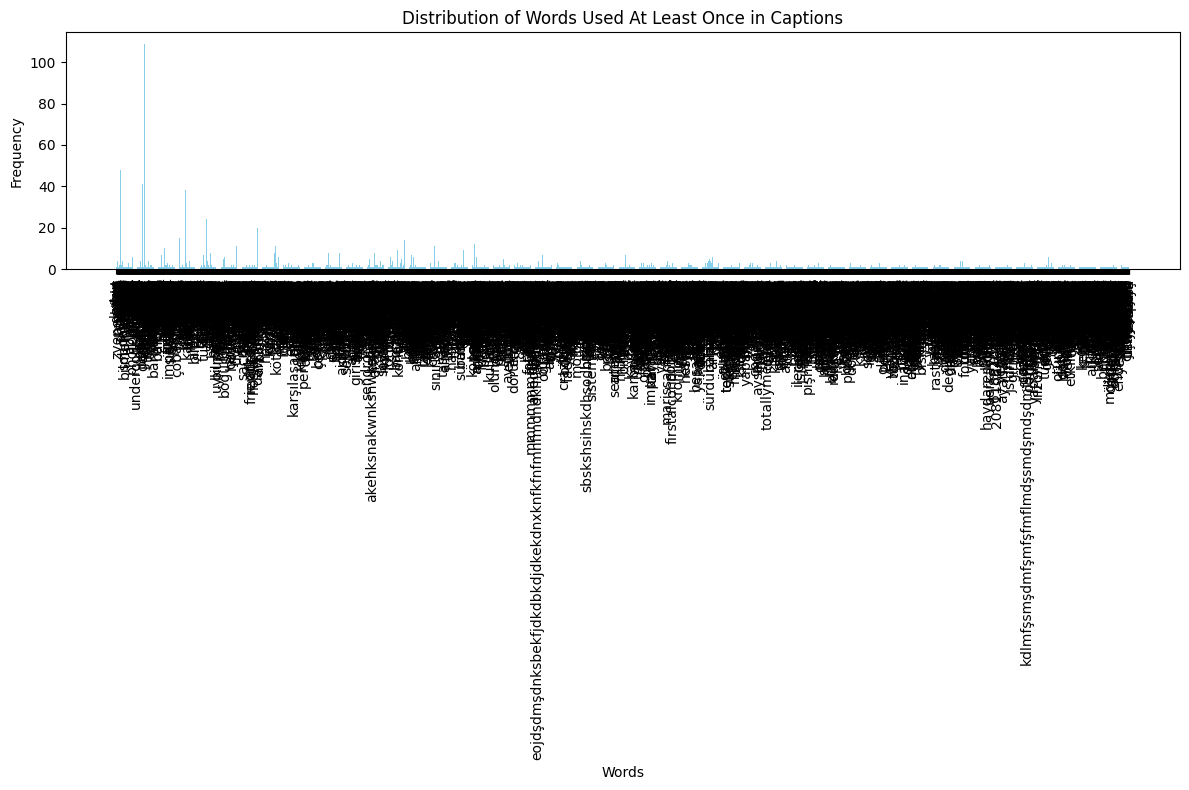

/var/folders/89/qyh48yt974db_rjsm_5b8g300000gn/T/ipykernel_17001/398401986.py:33: UserWarning: Glyph 129296 (\N{ZIPPER-MOUTH FACE}) missing from current font.
  plt.tight_layout()
/var/folders/89/qyh48yt974db_rjsm_5b8g300000gn/T/ipykernel_17001/398401986.py:33: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
/var/folders/89/qyh48yt974db_rjsm_5b8g300000gn/T/ipykernel_17001/398401986.py:33: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  plt.tight_layout()
/var/folders/89/qyh48yt974db_rjsm_5b8g300000gn/T/ipykernel_17001/398401986.py:33: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from current font.
  plt.tight_layout()
/var/folders/89/qyh48yt974db_rjsm_5b8g300000gn/T/ipykernel_17001/398401986.py:33: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from current font.
  plt.tight_layout()
/var/folders/89/qyh48yt974db_rjsm_5b8g300000gn/T/ipykernel_17001/398401986.py:33: UserWarning: Glyph 128153 (\N{BLUE HEART}) m

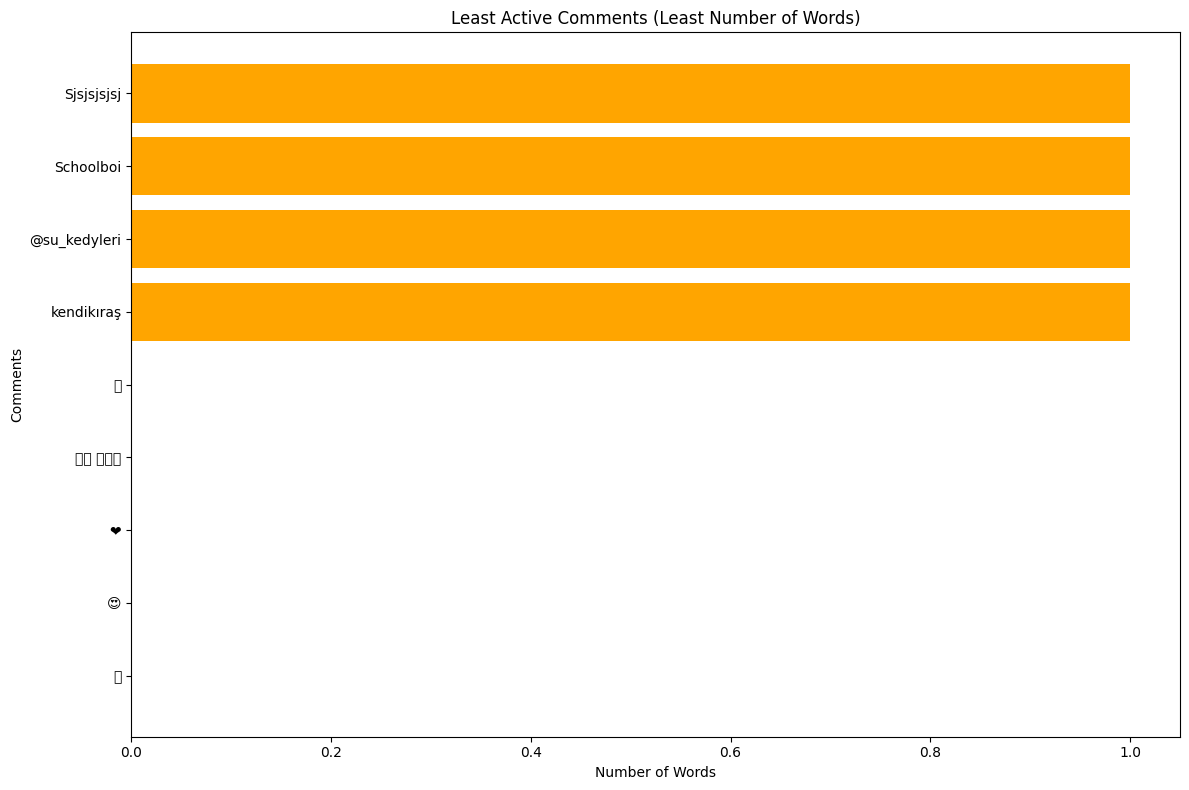

In [7]:
def plot_word_distribution_and_least_active(captions):
    # Count words
    all_text = " ".join([caption["caption"] for caption in captions])
    word_count = Counter(re.findall(r'\w+', all_text.lower()))
    
    # Words used at least once
    words_at_least_once = {word: count for word, count in word_count.items() if count >= 1}
    
    # Find the least active comments (comments with the least number of words)
    caption_word_counts = [(caption["caption"], len(re.findall(r'\w+', caption["caption"].lower()))) for caption in captions]
    least_active_comments = sorted(caption_word_counts, key=lambda x: x[1])[:10]
    
    # Data for plotting
    words, frequencies = zip(*words_at_least_once.items())
    comments, word_counts = zip(*least_active_comments)
    
    # Plot Words Used At Least Once
    plt.figure(figsize=(12, 8))
    plt.bar(words, frequencies, color='skyblue')
    plt.title("Distribution of Words Used At Least Once in Captions")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Plot Least Active Comments
    plt.figure(figsize=(12, 8))
    plt.barh(comments, word_counts, color='orange')
    plt.title("Least Active Comments (Least Number of Words)")
    plt.xlabel("Number of Words")
    plt.ylabel("Comments")
    plt.tight_layout()
    plt.show()

# Run the plot function
plot_word_distribution_and_least_active(categorized_data)

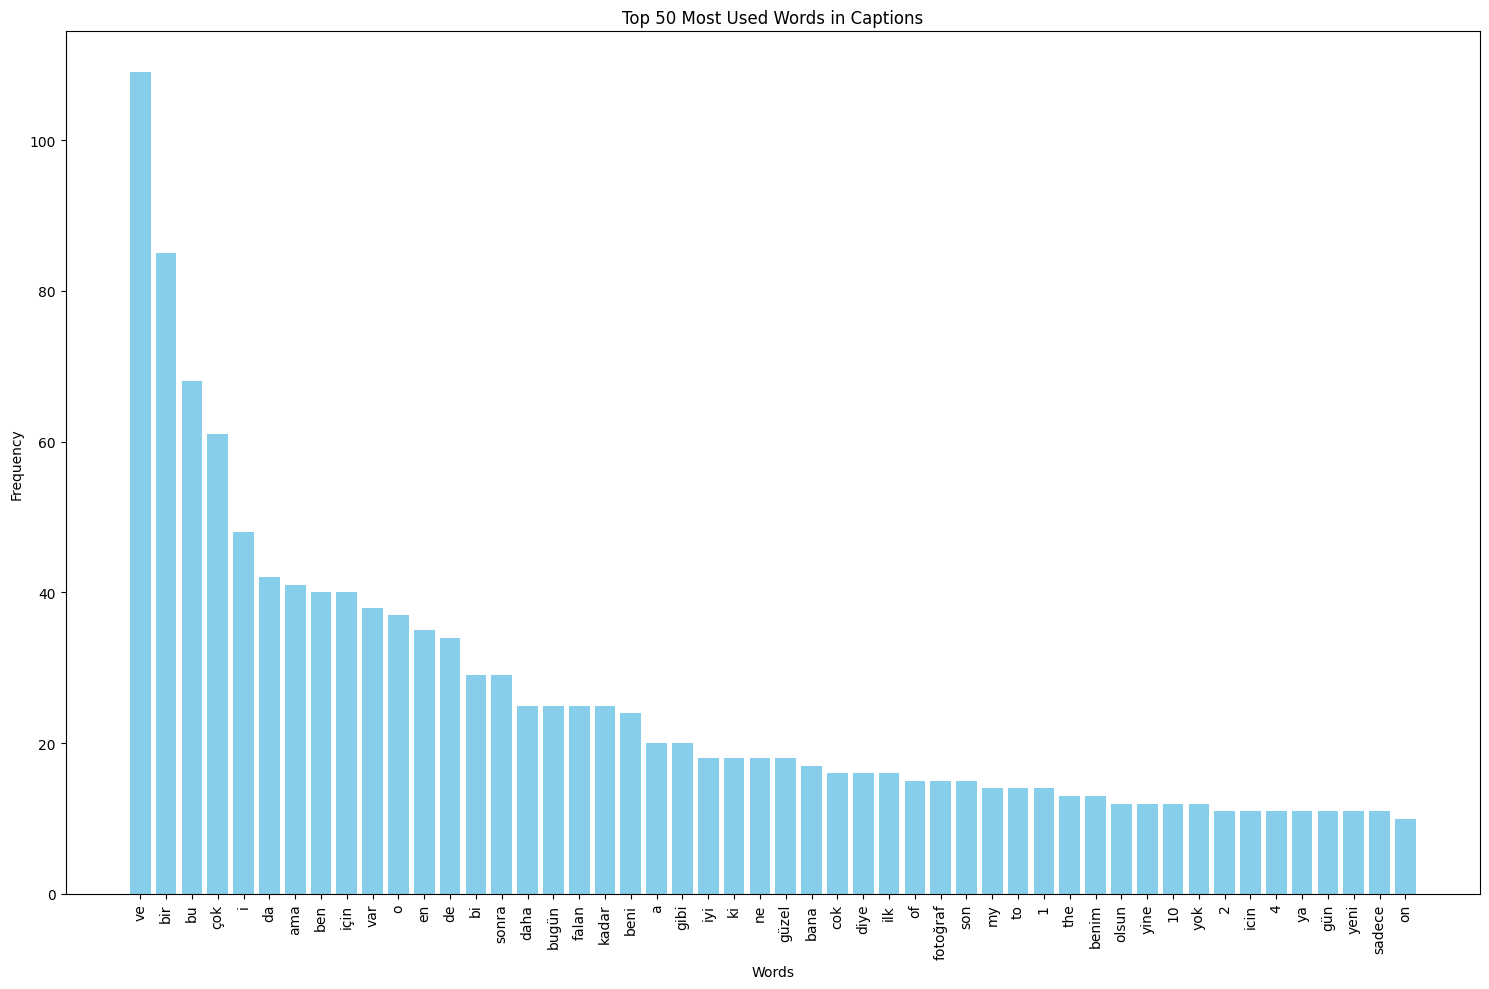

In [8]:
def plot_most_used_words(captions, top_n=50):
    # Count words
    all_text = " ".join([caption["caption"] for caption in captions])
    word_count = Counter(re.findall(r'\w+', all_text.lower()))
    most_common_words = word_count.most_common(top_n)
    
    # Data for plotting
    words, frequencies = zip(*most_common_words)
    
    # Plot Most Used Words
    plt.figure(figsize=(15, 10))
    plt.bar(words, frequencies, color='skyblue')
    plt.title(f"Top {top_n} Most Used Words in Captions")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Run the plot function
plot_most_used_words(categorized_data)

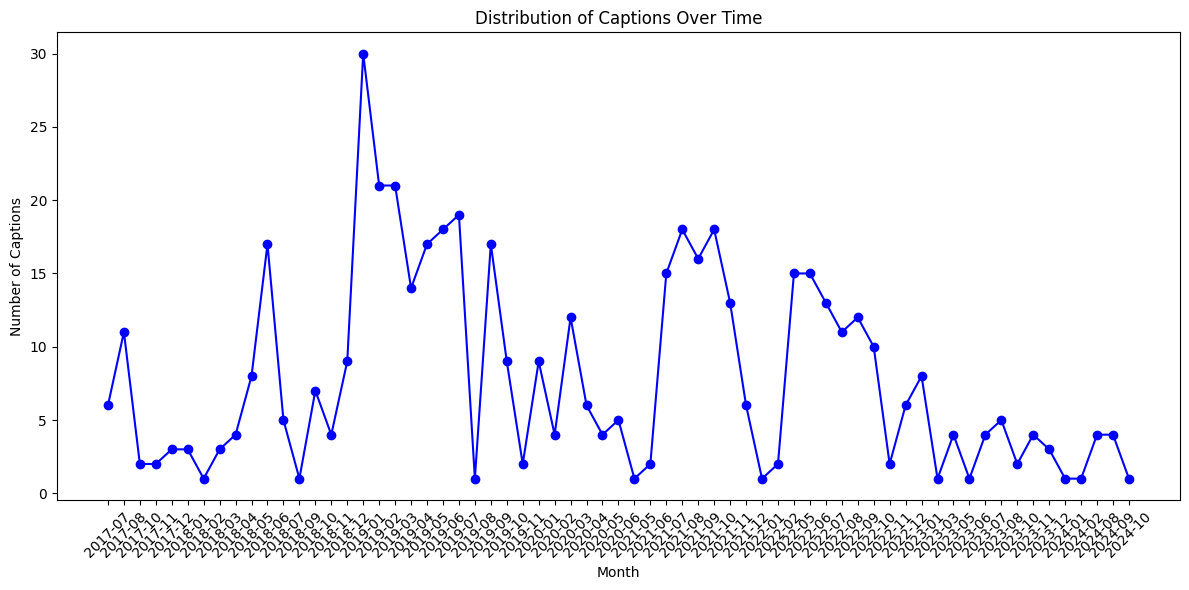

In [10]:
def plot_caption_distribution_over_time(captions):
    # Extract dates from captions
    caption_dates = [datetime.strptime(c["date"], "%Y-%m-%d %H:%M:%S") for c in captions]
    
    # Count the number of captions per month
    captions_per_month = Counter([date.strftime("%Y-%m") for date in caption_dates])
    
    # Sort the data by month
    sorted_months = sorted(captions_per_month.items())
    months, counts = zip(*sorted_months)
    
    # Plot the distribution
    plt.figure(figsize=(12, 6))
    plt.plot(months, counts, marker='o', linestyle='-', color='b')
    plt.title("Distribution of Captions Over Time")
    plt.xlabel("Month")
    plt.ylabel("Number of Captions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run the plot function
plot_caption_distribution_over_time(categorized_data)

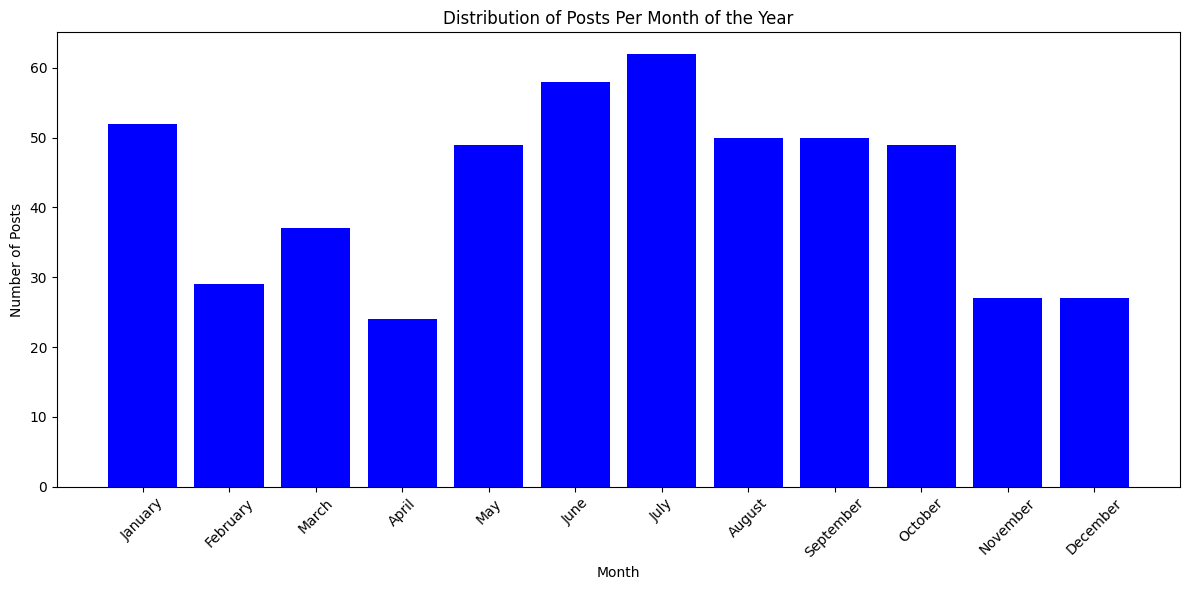

In [11]:
def plot_posts_per_month(captions):
    # Extract months from captions
    caption_dates = [datetime.strptime(c["date"], "%Y-%m-%d %H:%M:%S") for c in captions]
    months = [date.strftime("%B") for date in caption_dates]
    
    # Count the number of captions per month
    posts_per_month = Counter(months)
    
    # Sort the data by month order
    month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    sorted_months = [(month, posts_per_month[month]) for month in month_order]
    months, counts = zip(*sorted_months)
    
    # Plot the distribution
    plt.figure(figsize=(12, 6))
    plt.bar(months, counts, color='b')
    plt.title("Distribution of Posts Per Month of the Year")
    plt.xlabel("Month")
    plt.ylabel("Number of Posts")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run the plot function
plot_posts_per_month(categorized_data)

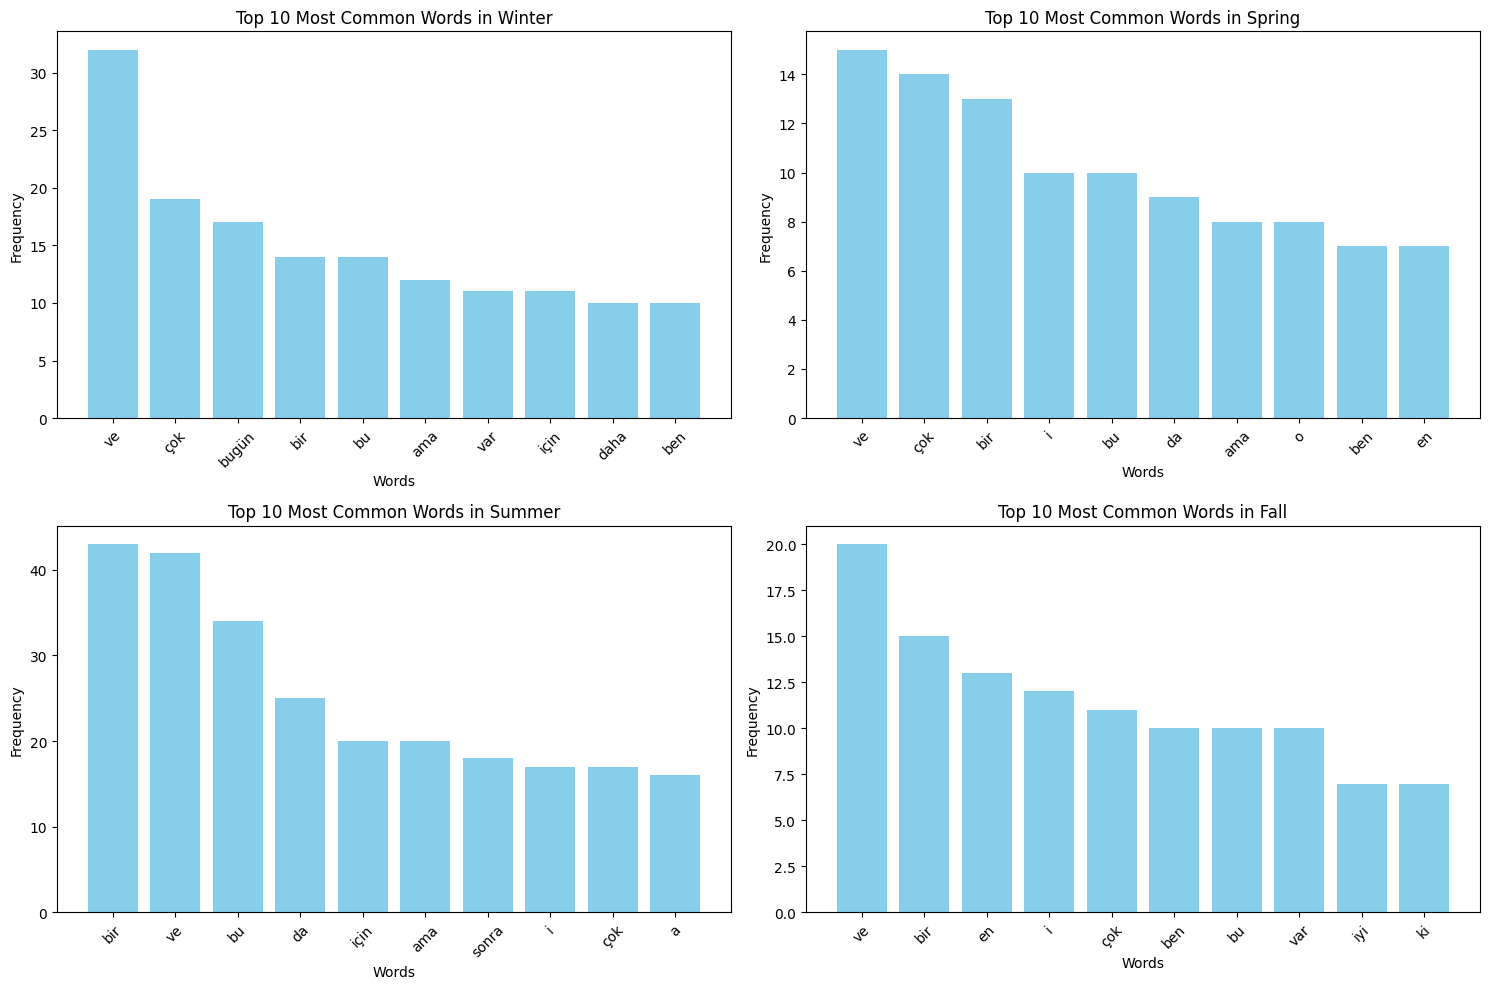

In [18]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

def plot_common_words_per_season(captions, top_n=10):
    # Categorize captions by season
    captions_by_season = {'Winter': [], 'Spring': [], 'Summer': [], 'Fall': []}
    for caption in captions:
        date = datetime.strptime(caption['date'], "%Y-%m-%d %H:%M:%S")
        season = get_season(date)
        captions_by_season[season].append(caption['caption'])
    
    # Count words for each season
    season_word_counts = {}
    for season, season_captions in captions_by_season.items():
        all_text = " ".join(season_captions)
        word_count = Counter(re.findall(r'\w+', all_text.lower()))
        most_common_words = word_count.most_common(top_n)
        season_word_counts[season] = most_common_words
    
    # Plot the most common words for each season
    plt.figure(figsize=(15, 10))
    for i, (season, words) in enumerate(season_word_counts.items(), 1):
        plt.subplot(2, 2, i)
        words, frequencies = zip(*words)
        plt.bar(words, frequencies, color='skyblue')
        plt.title(f"Top {top_n} Most Common Words in {season}")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run the plot function
plot_common_words_per_season(categorized_data)

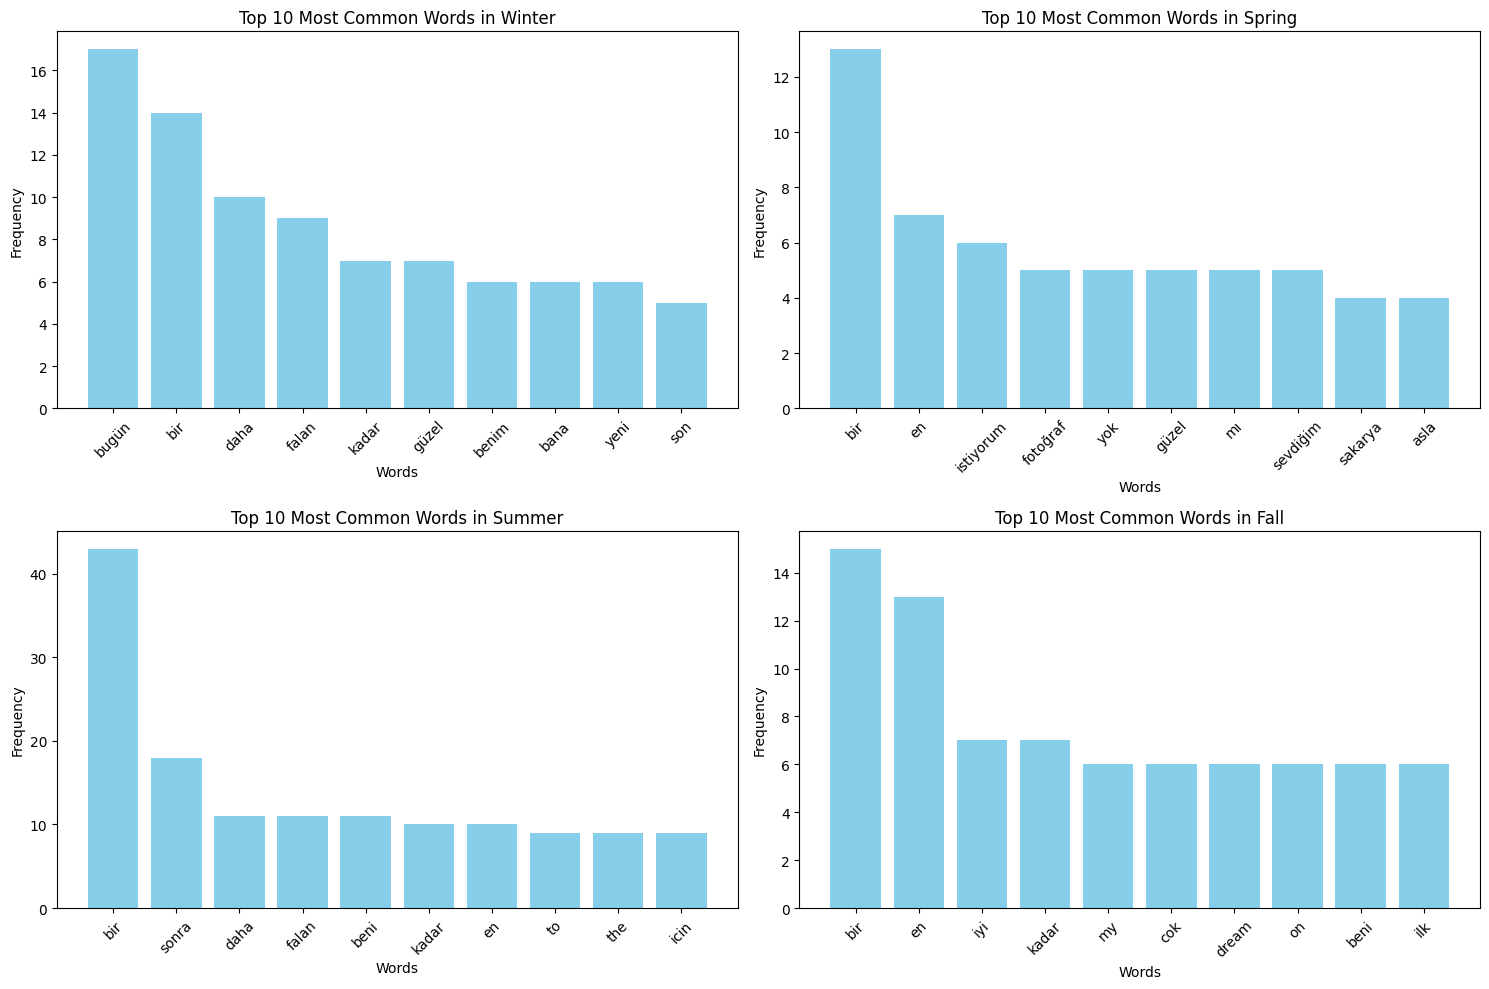

In [ ]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# List of Turkish stopwords
turkish_stopwords = {
    "ve", "çok", "bu", "da", "i", "bu", "çok", "a", "ben", "için", "var", "ile", 
    "olarak", "o", "şu", "ki", "mi", "de", "ise", "şey", "ama", "gibi", "ne",
}

# Function to clean captions by removing stopwords
def clean_text(text):
    words = re.findall(r'\w+', text.lower())
    return " ".join([word for word in words if word not in turkish_stopwords])

def plot_common_words_per_season(captions, top_n=10):
    # Categorize captions by season
    captions_by_season = {'Winter': [], 'Spring': [], 'Summer': [], 'Fall': []}
    for caption in captions:
        date = datetime.strptime(caption['date'], "%Y-%m-%d %H:%M:%S")
        season = get_season(date)
        captions_by_season[season].append(clean_text(caption['caption']))
    
    # Count words for each season
    season_word_counts = {}
    for season, season_captions in captions_by_season.items():
        all_text = " ".join(season_captions)
        word_count = Counter(re.findall(r'\w+', all_text.lower()))
        most_common_words = word_count.most_common(top_n)
        season_word_counts[season] = most_common_words
    
    # Plot the most common words for each season
    plt.figure(figsize=(15, 10))
    for i, (season, words) in enumerate(season_word_counts.items(), 1):
        plt.subplot(2, 2, i)
        words, frequencies = zip(*words)
        plt.bar(words, frequencies, color='skyblue')
        plt.title(f"Top {top_n} Most Common Words in {season}")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run the plot function
plot_common_words_per_season(categorized_data)

